
# Lecture 2 - Regression

## Representing Supervised Learning
We can represent supervised learning like so:
![Supervised Learning](img/supervised-learning.png)

## Regression Hypothesis
The regression hypothesis function is a function that will be used to guess an output for the passed in features. It can be represented like so, where there are j input features:
$$
h(x) = \theta_0 + \theta_1x_1 + ... + \theta_jx_j
$$

We can generalize this like so:
$$
h(x) = \sum \limits _{j=0} ^{n} \theta_jx_j
$$

Where:
- $x_0$ = 1

We can represent our input variables like so:
$$
\vec{x} = \begin{bmatrix}
x_1 \\
... \\
x_j
\end{bmatrix}
$$
We can represent our parameters like so:
$$
\vec{\theta} = \begin{bmatrix}
\theta_1 \\
... \\
\theta_j
\end{bmatrix}
$$


### Terminology
- $x_j$ is the input (Feature j) variable.
- $y$ is the output variable.
- $n$ is the number of features.
- $m$ is the number of training examples.
- $\theta$ are the parameters.
- $(x, y)$ is a training example.
- $(x^{(i)}, y^{(i)})$ is the i-th training example.

__Note__: The superscript (i) is used to denote the i-th training example.

## Cost Function
The cost function is average of the squared differences between the predicted value and the actual value. It is represented like so:

In linear regression, we want to minimize the cost function which is represented like so:
$$Total Cost = \frac{1}{2} \sum \limits _{i=1} ^m ((y)^{(i)} - h(x^{(i)}))^2$$
$$J(\theta) = \frac{1}{2m} Total Cost$$
$$J(\theta) = \frac{1}{2m} \sum \limits _{i=1} ^m ((y)^{(i)} - h(x^{(i)}))^2$$

### Explanation
The cost function is used to measure how accurate our hypothesis function is. The closer the cost function is to 0, the more accurate our hypothesis function is.

1. $((y)^{(i)} - h(x^{(i)}))^2$ is the squared error for the i-th training example.
2. $\sum \limits _{i=1} ^m$, we then iterate through all the training sets and sum it all up then multiply by $\frac{1}{2}$ to get the total cost.
3. We multiply that sum by $\frac{1}{m}$ to get the average of all the costs.


## Gradient Descent

A local minimum is like a 'valley', where the cost function is at its lowest point. The goal of gradient descent is to find this local minimum.



In [ ]:
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Define the function to minimize
def f(x):
    return x**2 + 10*np.sin(x)

# Initialize the starting point
x_0 = 3

# Plot the function and the progress of gradient descent
x = np.linspace(-5, 5, 100)
y = f(x)

# d/dx = 0 : https://www.wolframalpha.com/input?i=2x+%2B+10cos%28x%29+%3D+0
# Minimum points: -1.30644, 3.83747

min_pts = [-1.30644, 3.83747]

plt.plot(x, y, label='f(x)')
plt.scatter(np.array(min_pts), 
            f(np.array(min_pts)), 
            c='r', 
            label='Miminum points')
plt.legend()
plt.show()


The results shown above are the local minimums for the function, $f(x) = x^2 + 10sin(x)$. Here, we can find these values using the aforementioned strategy but it is not so possible in higher dimensions. Instead, we can use gradient descent to find these values.

The goal of gradient descent is to find values for $\theta$ that minimize the cost function, $J(\theta)$, so as to lower the "error" of our hypothesis function.

We can find these 'vallies' by doing the following iteratively until we find a local minimum:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$

__Derivation:__
We can simplify the above equation by solving for the derrivative.
Recall, 
$$J(\theta) = \frac{1}{2m} \sum \limits _{i=1} ^m ((y)^{(i)} - h(x^{(i)}))^2$$
where $i$ is the i-th training example. Let's first deal with 1 training example. For now, we will include the $\frac{1}{2}$ in the cost function to simplify our calculations.
$$\frac{1}{2} ((y)^{(i)} - h(x^{(i)}))^2$$
Let's find the derrivative of the above equation with respect to $\theta_j$.
$$= \frac{\partial}{\partial \theta_j} \frac{1}{2} (y - h(x))^2$$
Using chain rule, we can simplify the above equation like so:
$$= \frac{\partial}{\partial \theta_j} (\frac{1}{2} * 2 (y - h(x))^{2-1} \frac{\partial}{\partial \theta_j} (y - h(x)))$$
$$= (y - h(x)) \frac{\partial}{\partial \theta_j} (y - h(x))$$
$$= (y - h(x)) \frac{\partial}{\partial \theta_j} (y - \sum \limits _{k=0} ^n \theta_kx_k)$$
$j$ is the j-th parameter, so we can assumine that $0 \leq j \leq n$.
$$= (y - h(x)) \frac{\partial}{\partial \theta_j} (y - (... + \theta_jx_j + ...))$$
Finally, we derive the underived part. Notice, we are taking the partial derrivative with respect to $\theta_j$, so we can ignore all the terms that do not contain $\theta_j$ since they will be 0.
$$= (y - h(x)) x_j$$

Now, we can generalize the above equation for all the training examples.
$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum \limits _{i=1} ^m ((y)^{(i)} - h(x^{(i)}))x_j^{(i)}$$

### Explanation
The idea here is to update each parameter in $\theta$ by subtracting the partial derivative of $J(\theta)$ with respect to $\theta_j$ multiplied by $\alpha$.
1. We first initialize $\theta$ to some values like ${\theta} = \vec{0}$.
2. We keep updating $\theta$ until we find a local minimum.
    - In each iteration, we update each parameter in $\theta$ by subtracting $\alpha \frac{\partial}{\partial \theta_j} J(\theta)$.
    - $\alpha$ is the learning rate (A multiplier that determines how much should each iteration move by).
    - $\frac{\partial}{\partial \theta_j} J(\theta)$ gives us the direction and how much the update should move for the j-th parameter.

__Why do we subtract by the derrivative?__
The derrivative tells us how much parameter, $\theta_j$ needs to move given some change, $\triangle \theta_j$ (steepness) for the current position of the cost function at $\theta$. This which gives us an idea of how 'close' the point is to a local minimum. This is because the minimum points have a gradient of $0$ which means if our the graident of current position is closer to $0$, we can say the point is nearby a local minimum. Thus, the closer we are to a local minimum, the smaller the distance we need to move. This way, we do not overshoot the local minimum.

A property of derrivatives is that the direction of the movement will approach a local maximum if we move in the direction of $+\triangle \theta_j$ and conversely, a local minimum if we move by $-\triangle \theta_j$. This is why we subtract by the derrivative.

## Batch Gradient Descent
The above algorithm is known as __Batch Gradient Descent__ which uses _ALL_ the training examples to update the parameters. 

Let's apply it to an example. In our example, we want to predict how much rainfall will occur given the temperature and humidity. The dataset can be found at `/datasets/weather.xls`.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Iteration 0: 9.025915022190448
Iteration 1: 8.912463003739731
Iteration 2: 8.659640433935342
Iteration 3: 8.641944177260935
Iteration 4: 8.582379484189069
Iteration 5: 8.579489827856976
Iteration 6: 8.565664633724406
Iteration 7: 8.564985822160217
Iteration 8: 8.561954984888944
Iteration 9: 8.561788976044465
Iteration 10: 8.561099621028168
Iteration 11: 8.561018876542315
Iteration 12: 8.56087545101771
Iteration 13: 8.560851587198213
Iteration 14: 8.560809300096974
Iteration 15: 8.560788762926444
Iteration 16: 8.560772723485476
Iteration 17: 8.560761137198059
Iteration 18: 8.560748350021159
Iteration 19: 8.560735671465677
Iteration 20: 8.560724187346091
Iteration 21: 8.560713091340087
Iteration 22: 8.560701744237278
Iteration 23: 8.560690251514838
Iteration 24: 8.560678984773809
Iteration 25:

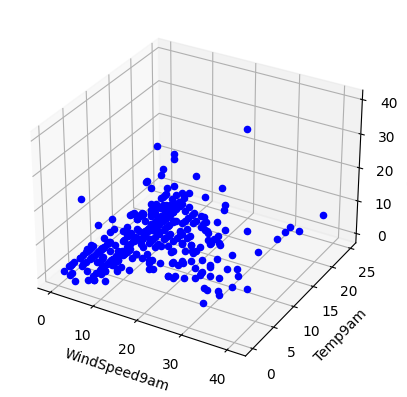

In [57]:
%pip install numpy
%pip install matplotlib
%pip install pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

input_cols = ['WindSpeed9am', 'Temp9am']
output_col = 'Rainfall'

data = pd.read_csv('datasets/weather.csv',
                   usecols=[*input_cols, output_col])

def hypothesis(x: list[float] = [], parameters: list[float] = []):
    # print(f"{x} {parameters}")
    return np.dot(x, parameters)

def calc_cost_for_example(x: list[float] = [], y = 0, parameters: list[float] = []) -> float:
    return (hypothesis(x, parameters) - y)**2

def calc_cost_for_row(row: pd.Series, parameters: list[float] = []) -> float:
    return calc_cost_for_example(
        [1, *map(lambda inp: row[inp], input_cols)],
        row[output_col],
        parameters
    )

def calc_total_cost(df: pd.DataFrame, parameters: list[float] = []) -> float:
    return df.apply(
        lambda row: calc_cost_for_row(row, parameters),
        axis=1
    ).sum()

def calc_average_cost(df: pd.DataFrame, parameters: list[float] = []) -> float:
    return calc_total_cost(df, parameters) / (2 * df.shape[0])

def calc_derrivative_for_example(x: list[float] = [], 
                                 y = 0,
                                 parameters: list[float] = [],
                                 parameter_index = 0) -> float:
    return (hypothesis(x, parameters) - y) * x[parameter_index]

def calc_derrivative_for_row(row: pd.Series, 
                             parameters: list[float] = [],
                             parameter_index = 0) -> float:
    return calc_derrivative_for_example(
        [1, *map(lambda inp: row[inp], input_cols)],
        row[output_col],
        parameters,
        parameter_index
    )

row = data.iloc[2]
# print(row)
# print(f"{[1, *map(lambda inp: row[inp], input_cols)]} {row[output_col]}")
df = pd.DataFrame(data)
# Remove rows with NaN values
df = df.dropna()
# print(df.shape)
# print(calc_average_cost(df, [0, 0, 0]))
numberOfExamples = df.shape[0]

iterations = 1000
learning_rate = 0.01
parameters = [0, 0, 0]

# print(f"Initial cost: {df.iloc[113]}")
# print(f"Test: {[2, *[1, 2, 3]]}")

# for i in range(iterations):
#     new_parameters = parameters.copy()
#     for j in range(len(parameters)):
#         d_cost = 0
#         for example in range(numberOfExamples):
#             example_row = df.iloc[example]
#             d_cost += calc_derrivative_for_row(example_row, new_parameters, j) 
#         delta = d_cost / numberOfExamples
#         new_parameters[j] = parameters[j] - learning_rate * delta
#     parameters = new_parameters
#     print(f'Iteration {i}: {calc_average_cost(df, parameters)}')

for i in range(iterations):
    new_parameters = parameters.copy()
    for j in range(len(parameters)):
        d_cost = 0
        for example in range(numberOfExamples):
            example_row = df.iloc[example]
            d_cost += calc_derrivative_for_row(example_row, new_parameters, j) 
        delta = d_cost / numberOfExamples
        new_parameters[j] = parameters[j] - learning_rate * delta
    parameters = new_parameters
    print(f'Iteration {i}: {calc_average_cost(df, parameters)}')

# x = np.linspace(0, 500, 100)
# # y = f(x)
ax = plt.figure().add_subplot(projection='3d')

ax.set_xlabel(input_cols[0])
ax.set_ylabel(input_cols[1])
ax.set_zlabel(output_col)
for row in df.iterrows():
    ax.scatter(row[1][input_cols[0]], row[1][input_cols[1]], row[1][output_col], c='b')

# # ax.scatter(x, y, zs=0, zdir='y', c=, label='points in (x, z)')

# # plt.plot(x, y, zs=0, zdir='z', label='f(x)')
# plt.show()
# # plt.scatter(np.array(x_list), f(np.array(x_list)), c='r', label='Gradient Descent')
# # # plt.scatter(x_list, f(x_list), c='r', label='Gradient Descent')
# # plt.legend()
# # plt.show()



## Stochastic Gradient Descent
In the previous section, we computed the next moves of each parameter using _ALL_ the training examples. This is known as __Batch Gradient Descent__ which is extremely costly.

Instead, we can use a technique called _stochastic gradient descent_ which uses only 1 training example at a time. This is much faster than using all the training examples.